First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Class Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


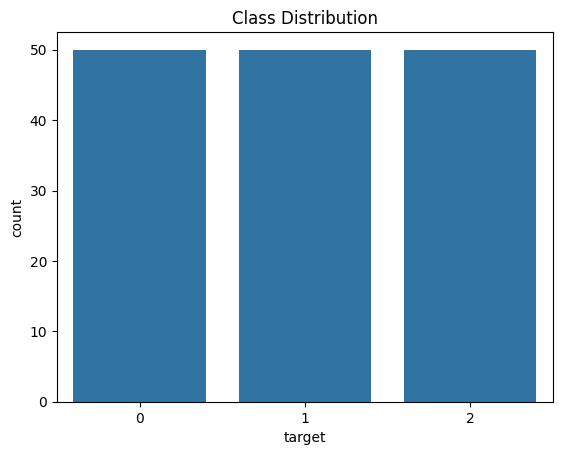

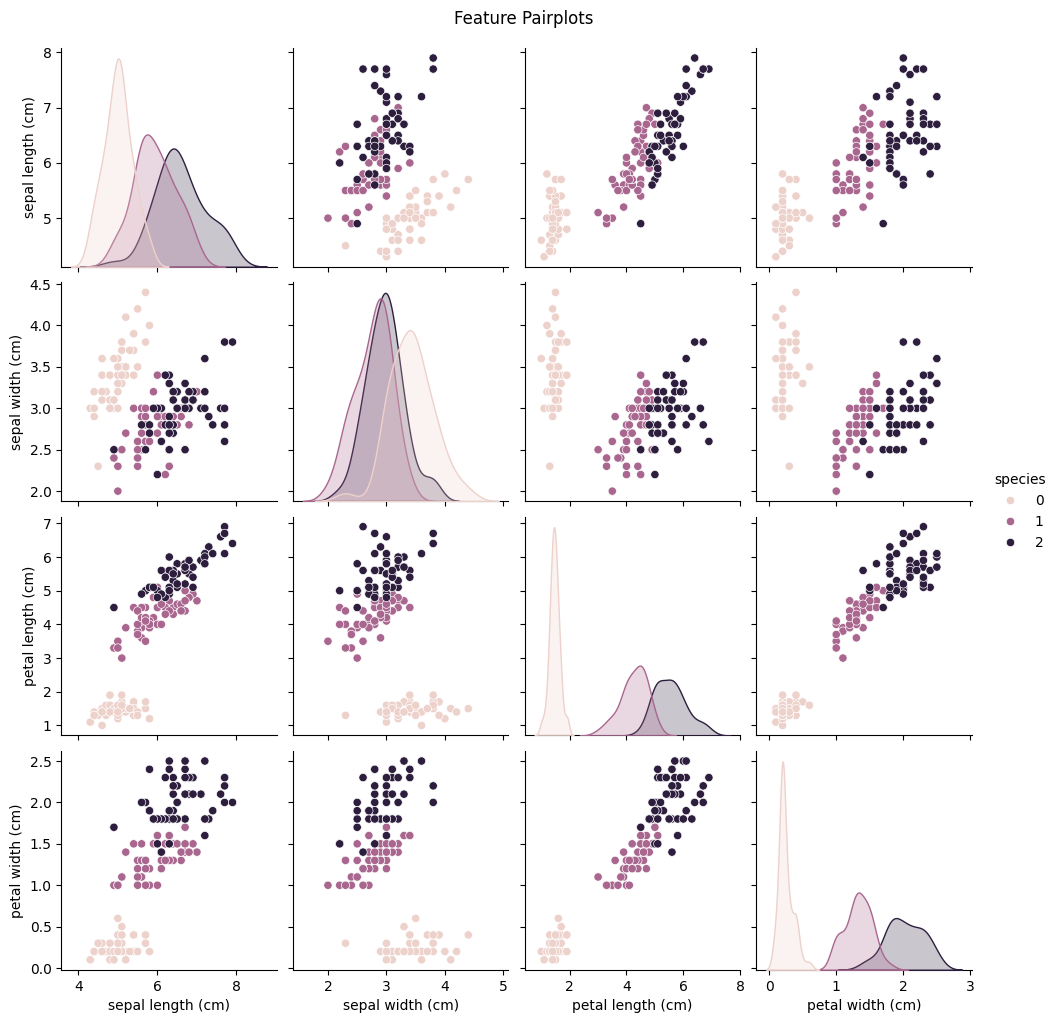


Selected Features:
['petal length (cm)' 'petal width (cm)']

Accuracy: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



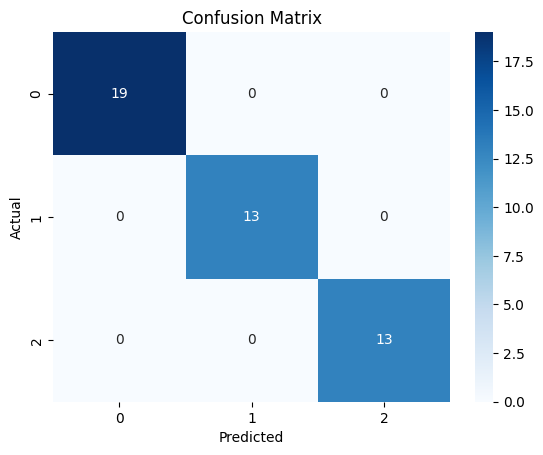

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Data Loading and Exploration
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

print("First 5 rows of the dataset:")
print(X.head())

print("\nClass Distribution:")
print(y.value_counts())

# Visualizing Class Distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Pairplot for Feature Exploration
sns.pairplot(pd.concat([X, y.rename('species')], axis=1), hue='species')
plt.suptitle('Feature Pairplots', y=1.02)
plt.show()

# 2. Feature Selection
# Using ANOVA F-test to select top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("\nSelected Features:")
print(np.array(iris.feature_names)[selector.get_support()])

# 3. Model Training
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()